#     Projet SVM (Support Vector Machines)

                                Fraude dans le secteur du vin

La fraude sur le vin concerne les aspects commerciaux du vin. Le type de fraude le plus répandu est celui où les vins sont frelatés, généralement par l'ajout de produits moins chers (par exemple des jus) et parfois de produits chimiques et d'édulcorants nocifs (pour compenser la couleur ou la saveur).

La contrefaçon et le changement d'étiquette de vins de qualité inférieure et moins chers pour des marques plus coûteuses est un autre type de fraude courante.

    Objectifs du projet

Une société de distribution qui a récemment été victime d'une fraude a réalisé un audit de divers échantillons de vin en utilisant l'analyse chimique sur des échantillons. La société de distribution est spécialisée dans l'exportation de vins chers et de très haute qualité, mais elle a été victime d'une fraude de la part d'un fournisseur qui tentait de faire passer des vins bon marché et de faible qualité pour des vins de qualité supérieure. La société de distribution vous a engagé pour tenter de créer un modèle de Machine Learning qui puisse aider à détecter les échantillons de vin de mauvaise qualité (alias "fraude"). Elle veut savoir s'il est même possible de détecter une telle différence.

Source des données : P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('F:/dataanalytics/_DATA/wine_fraud.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


    Exploration des données

In [6]:
df['quality'].unique()   

array(['Legit', 'Fraud'], dtype=object)

In [7]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

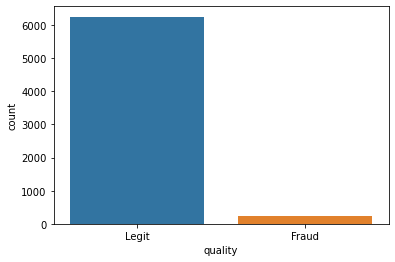

In [8]:
sns.countplot(data=df,x='quality')

<AxesSubplot:xlabel='type', ylabel='count'>

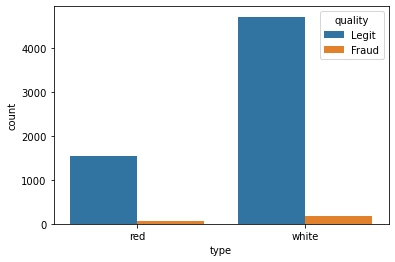

In [9]:
sns.countplot(data=df,x='type',hue='quality')

In [10]:
df['fraud']=df['quality'].apply(lambda x:1 if x== 'Fraud' else 0)  #On attribue de valeur 0 ou 1 au qualité de vin.
df['fraud']

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: fraud, Length: 6497, dtype: int64

In [11]:
#Vin rouge
vins_red_Fraud = len(df[(df['type'] == 'red') & (df['quality'] == 'Fraud')])
vins_red_Fraud

63

In [12]:
vins_red_Legit = len(df[(df['type'] == 'red') & (df['quality'] == 'Legit')])
vins_red_Legit

1536

In [13]:
Pourcentage_vins_red_Fraud = (vins_red_Fraud/(vins_red_Fraud+vins_red_Legit))*100
print(f'Le pourcentage de vins rouges frauduleux: {Pourcentage_vins_red_Fraud}')

Le pourcentage de vins rouges frauduleux: 3.9399624765478425


In [14]:
#Vin blanc
vins_white_Fraud = len(df[(df['type'] == 'white') & (df['quality'] == 'Fraud')])
vins_white_Fraud

183

In [15]:
vins_white_Legit = len(df[(df['type'] == 'white') & (df['quality'] == 'Legit')])
vins_white_Legit

4715

In [16]:
Pourcentage_vins_white_Fraud = (vins_white_Fraud/(vins_white_Fraud+vins_white_Legit))*100
print(f'Le pourcentage de vins blancs frauduleux: {Pourcentage_vins_white_Fraud}')

Le pourcentage de vins blancs frauduleux: 3.7362188648427925


In [17]:
df.corr()['fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
fraud                   1.000000
Name: fraud, dtype: float64

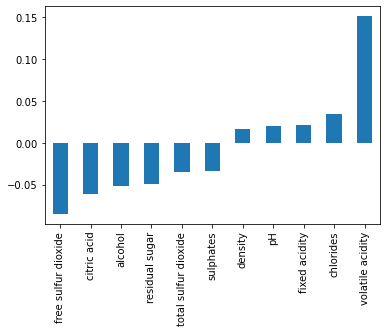

In [19]:
df.corr()['fraud'][:-1].sort_values().plot(kind='bar');

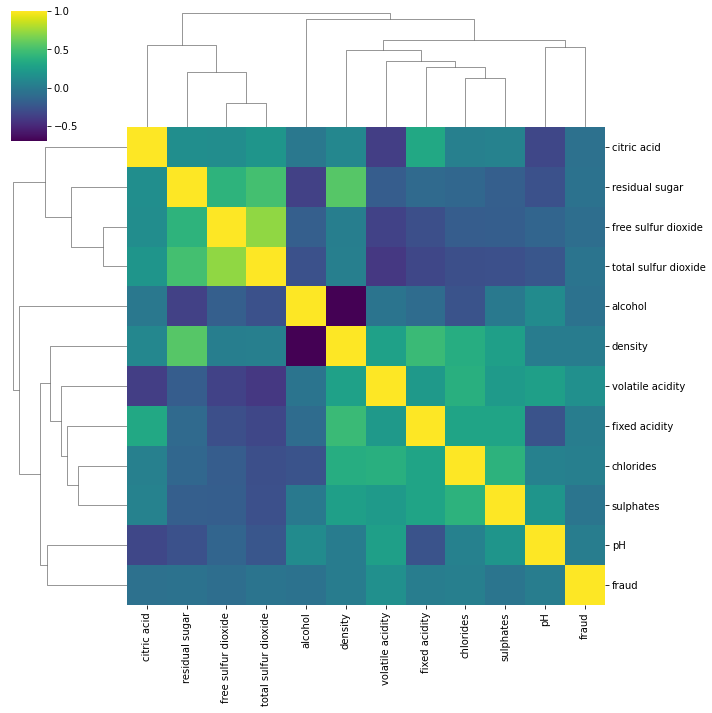

In [23]:
sns.clustermap(df.corr(),cmap='viridis')

    Modèle de Machine Learning


In [24]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,0


In [27]:
X = df.drop('quality',axis=1)
y = df['quality']

In [28]:
# On doit supprimer la colonne 'fraud'
df = df.drop('fraud',axis=1)

In [30]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0


In [31]:
# y: sortie
X = df.drop('quality',axis=1)
y = df['quality']

In [32]:
#importer train_test_split
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [34]:
#StandardScaler
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [37]:
#Importer SVC
from sklearn.svm import SVC

In [38]:
svc = SVC(class_weight='balanced')

In [39]:
#Importer GridSearchCV
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [42]:
grid.fit(scaled_X_train,y_train)
print(grid.fit(scaled_X_train,y_train))  #print(), pour certains cas, est nécessaire.

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})


In [43]:
#meilleurs paramètres
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [44]:
#Importer confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
grid_pred = grid.predict(scaled_X_test)

In [46]:
confusion_matrix(y_test,grid_pred)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [47]:
#Voir classification_report
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

